
## Exploratory Data Analysis (EDA) of Viking Artifacts Dataset

This notebook presents an exploratory data analysis of a dataset containing information about Viking artifacts.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:

# Load the dataset
war_dataset = pd.read_csv('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/war_translated.csv')



### Basic Overview of the War Dataset


In [3]:
# The regular expression '\d+' extracts one or more digits
war_dataset['Era Start Year'] = war_dataset['Era Start Year'].str.extract('(\d+)')

# Convert the extracted numbers to a numeric datatype
war_dataset['Era Start Year'] = pd.to_numeric(war_dataset['Era Start Year'])

# Step 1: Select non-object columns
non_object_columns = list(war_dataset.select_dtypes(exclude=['object']).columns)


In [4]:

# Step 2: Select object columns that end with '_Translated'
object_translated_columns = list(war_dataset.select_dtypes(include=['object']).filter(like='_translated').columns)
additional_columns = ["Unique Name", "Museum", ]  # Replace with your column names
object_translated_columns.extend(additional_columns)


In [5]:
type(object_translated_columns)

list

In [6]:

# Step 3: Combine both lists using list concatenation
final_columns = non_object_columns + object_translated_columns

# Step 4: Select these columns from the dataframe
final_dataframe = war_dataset[final_columns]

In [7]:

basic_overview = {
    "Number of Rows": final_dataframe.shape[0],
    "Number of Columns": final_dataframe.shape[1],
    "Data Types": final_dataframe.dtypes
}
basic_overview


{'Number of Rows': 464,
 'Number of Columns': 37,
 'Data Types': Förvärvsnr.                       float64
 Antal                             float64
 Förvärvsnummer                    float64
 Förvärvsdatum                     float64
 Antal fragment                    float64
 plats_latitude                    float64
 plats_longitude                   float64
 historisk_plats_latitude          float64
 historisk_plats_longitude         float64
 Era Start Year                    float64
 Era End Year                      float64
 Föremålsbenämning_translated       object
 Föremålsnr._translated             object
 Andra nummer_translated            object
 Material_translated                object
 Plats_translated                   object
 Fornlämning_translated             object
 Socken_translated                  object
 Landskap_translated                object
 Land_translated                    object
 Kontexttyp_translated              object
 Kontextnr._translated           


### Summary Statistics and Missing Values Analysis


In [8]:

# Summary Statistics for Numerical Data
numerical_summary = final_dataframe.describe()

numerical_summary

,Förvärvsnr.,Antal,Förvärvsnummer,Förvärvsdatum,Antal fragment,plats_latitude,plats_longitude,historisk_plats_latitude,historisk_plats_longitude,Era Start Year,Era End Year
count,458.000000,436.000000,458.000000,458.000000,192.000000,118.000000,118.000000,1.510000e+02,1.510000e+02,463.000000,463.000000
mean,26689.157205,1.793578,26689.157205,1967.421397,7.979167,55.380302,13.870239,4.631448e+01,1.104803e+01,796.652268,1106.911447
std,10882.315019,3.355360,10882.315019,49.776429,10.984024,9.629321,14.260717,1.853559e-13,4.099217e-14,29.325425,45.533950
min,432.000000,1.000000,432.000000,1820.000000,1.000000,-5.220006,-71.800061,4.631448e+01,1.104803e+01,500.000000,1100.000000
25%,17343.000000,1.000000,17343.000000,1923.000000,1.000000,46.314475,11.048029,4.631448e+01,1.104803e+01,800.000000,1100.000000
50%,34000.000000,1.000000,34000.000000,2000.000000,3.000000,58.050810,16.093554,4.631448e+01,1.104803e+01,800.000000,1100.000000
75%,34000.000000,1.000000,34000.000000,2000.000000,10.250000,60.317277,18.239923,4.631448e+01,1.104803e+01,800.000000,1100.000000
max,35000.000000,40.000000,35000.000000,2011.000000,69.000000,67.588819,120.217395,4.631448e+01,1.104803e+01,800.000000,1500.000000


In [9]:

# Missing Values Analysis
missing_values = final_dataframe.isnull().sum()

missing_values


Förvärvsnr.                         6
Antal                              28
Förvärvsnummer                      6
Förvärvsdatum                       6
Antal fragment                    272
plats_latitude                    346
plats_longitude                   346
historisk_plats_latitude          313
historisk_plats_longitude         313
Era Start Year                      1
Era End Year                        1
Föremålsbenämning_translated        0
Föremålsnr._translated              0
Andra nummer_translated             0
Material_translated                 1
Plats_translated                   21
Fornlämning_translated             98
Socken_translated                  13
Landskap_translated                 9
Land_translated                     0
Kontexttyp_translated             134
Kontextnr._translated             141
Kategori_translated                 0
Datering_translated                 1
Tidsperiod_translated               0
Föremålsnummer_translated           0
Historisk pl


### Categorical Data Analysis



### Visualizations


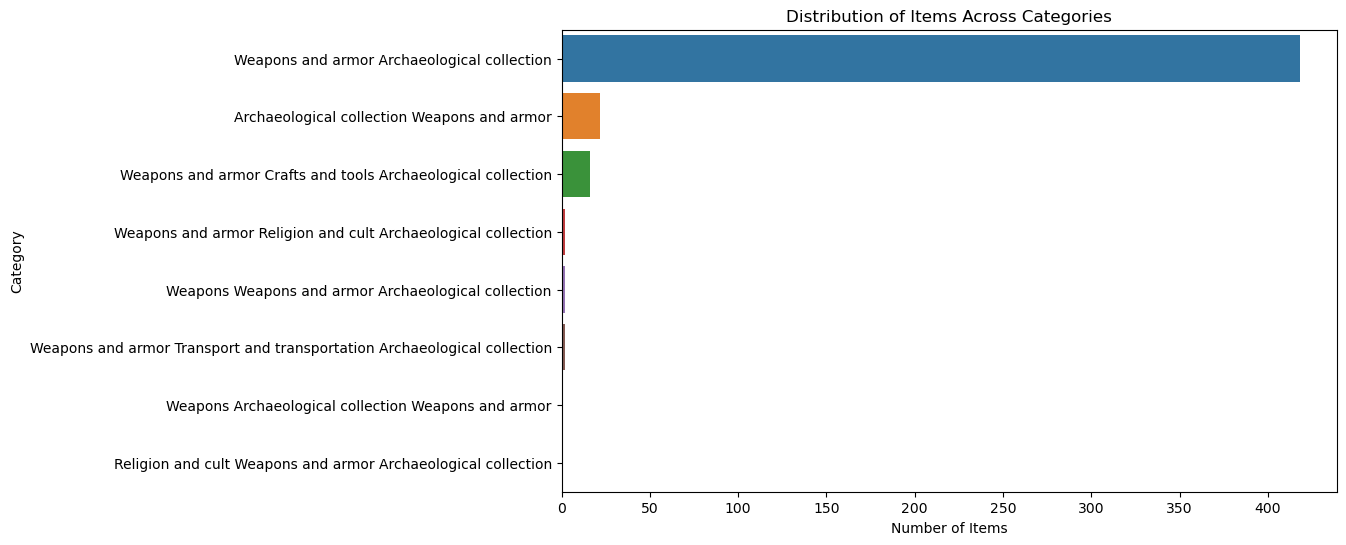

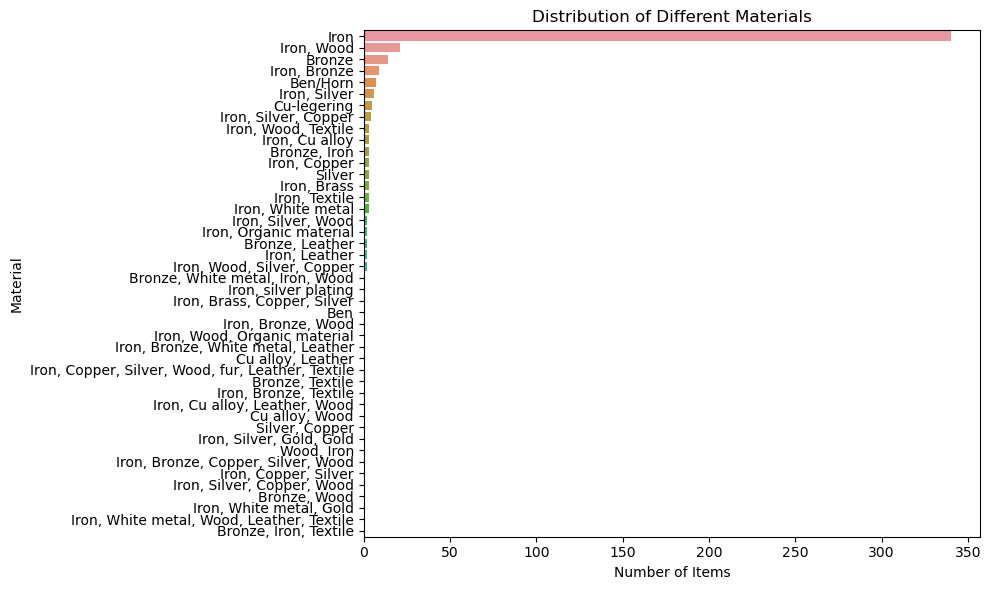

In [10]:

# Visualization 1: Bar Plot for Museum Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Kategori_translated', data=final_dataframe, order = final_dataframe['Kategori_translated'].value_counts().index)
plt.title('Distribution of Items Across Categories')
plt.xlabel('Number of Items')
plt.ylabel('Category')

# Visualization 2: Bar Plot for Material Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Material_translated', data=final_dataframe, order = final_dataframe['Material_translated'].value_counts().index)
plt.title('Distribution of Different Materials')
plt.xlabel('Number of Items')
plt.ylabel('Material')

plt.tight_layout()
plt.show()
